In [ ]:
from tables import start
start()
#заполняем таблички

In [1]:
import pandas as pd
from value import Value
tab1 = pd.read_csv("tables/202_1.tab", sep="\t")
tab2 = pd.read_csv("tables/202_2.tab", sep="\t")
tab3 = pd.read_csv("tables/202_3.tab", sep="\t")
tab1['x'] = tab1['x'].apply(lambda x: Value(const=x))
tab2['x'] = tab2['x'].apply(lambda x: Value(const=x))
tab3['x'] = tab3['x'].apply(lambda x: Value(const=x))
tab1['t1'] = tab1['t1'].apply(lambda t: Value(values=[t], syst=t * 0.02))
tab1['t2'] = tab1['t2'].apply(lambda t: Value(values=[t], syst=t * 0.02))
tab2['t1'] = tab2['t1'].apply(lambda t: Value(values=[t], syst=t * 0.02))
tab2['t2'] = tab2['t2'].apply(lambda t: Value(values=[t], syst=t * 0.02))
tab3['t1'] = tab3['t1'].apply(lambda t: Value(values=[t], syst=t * 0.02))
tab3['t2'] = tab3['t2'].apply(lambda t: Value(values=[t], syst=t * 0.02))

In [2]:
tab1['tmid'] = (tab1['t1'] + tab1['t2']) / 2.0
tab3['tmid'] = (tab2['t1'] + tab2['t2']) / 2.0
tab2['tmid'] = (tab3['t1'] + tab3['t2']) / 2.0

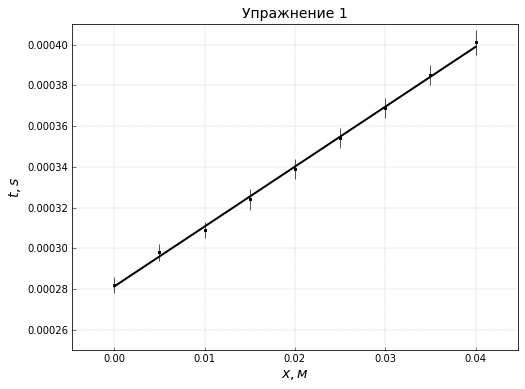

347 ± 5
1.42 ± 0.04


In [3]:
from plotter import Plotter
%matplotlib inline

fit = Plotter(draw_legend=False).set_name("202_ox").set_title("Упражнение 1").set_y_name("$t, s$").set_x_name(
        "$x, м$"). \
        add_line(Plotter.get_new_line(y_value=tab1['tmid'] * 5 / 10**6, x_value=tab1['x'] / 1000,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True, ylim=[0.00025, 0.00041])
v1 = 1 / Value(values=[float(fit[0].a)], syst=float(fit[0].sigma_a)) + 7
print(v1)
gamma1 = 29 * 10 ** -3 * v1**2 / (8.31 * 297)
print(gamma1)

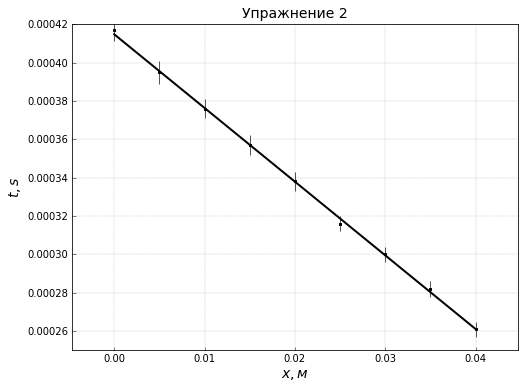

322 ± 3
1.68 ± 0.03


In [4]:
from plotter import Plotter
%matplotlib inline

fit = Plotter(draw_legend=False).set_name("202_ar").set_title("Упражнение 2").set_y_name("$t, s$").set_x_name(
        "$x, м$"). \
        add_line(Plotter.get_new_line(y_value=tab2['tmid'] * 5 / 10**6, x_value=tab2['x'] / 1000,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True, ylim=[0.00025, 0.00042])
v2 = -1 / Value(values=[float(fit[0].a)], syst=float(fit[0].sigma_a)) + 62
print(v2)
gamma2 = 40 * 10 ** -3 * v2**2 / (8.31 * 297)
print(gamma2)

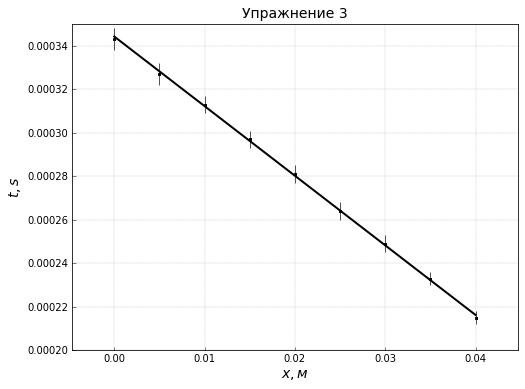

279 ± 3
1.39 ± 0.03
0.06 ± 0.17 0.01 ± 0.02


In [5]:
from plotter import Plotter
%matplotlib inline

fit = Plotter(draw_legend=False).set_name("202_co2").set_title("Упражнение 3").set_y_name("$t, s$").set_x_name(
        "$x, м$"). \
        add_line(Plotter.get_new_line(y_value=tab3['tmid'] * 5 / 10**6, x_value=tab3['x'] / 1000,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True, ylim=[0.0002, 0.00035])
v3 = -1 / Value(values=[float(fit[0].a)], syst=float(fit[0].sigma_a)) - 33
print(v3)
gamma3 = 44 * 10 ** -3 * v3**2 / (8.31 * 297)
print(gamma3)
Ck = (7 - 5 * gamma3) / (2 * (gamma3 - 1))
print(Ck, Ck / 8.31)